본 자료는 다음 링크의 내용을 참고하였습니다.

- Reference : https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset?resource=download&select

# 한국 드라마 추천

## 1. 평점 필터링

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [49]:
df = pd.read_csv('../kdrama.csv')

In [3]:
df.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [7]:
df.shape

(250, 17)

In [9]:
df.isna().sum()

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          5
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                1
Screenwriter            1
Cast                    0
Production companies    2
Rank                    0
dtype: int64

In [11]:
# 결측치 채우기
df.fillna(' ', inplace=True)

In [13]:
df.isna().sum()

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          0
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                0
Screenwriter            0
Cast                    0
Production companies    0
Rank                    0
dtype: int64

In [7]:
df.columns

Index(['Name', 'Aired Date', 'Year of release', 'Original Network', 'Aired On',
       'Number of Episodes', 'Duration', 'Content Rating', 'Rating',
       'Synopsis', 'Genre', 'Tags', 'Director', 'Screenwriter', 'Cast',
       'Production companies', 'Rank'],
      dtype='object')

In [15]:
df.describe()

,Year of release,Number of Episodes,Rating
count,250.00000,250.000000,250.000000
mean,2018.25600,19.064000,8.534000
std,3.26452,13.245743,0.221359
min,2003.00000,1.000000,8.300000
25%,2017.00000,16.000000,8.300000
50%,2019.00000,16.000000,8.500000
75%,2021.00000,20.000000,8.700000
max,2022.00000,133.000000,9.200000


In [45]:
# 연도별 드라마 수
drama_counts = df['Year of release'].value_counts().sort_index()
drama_counts

Year of release
2003     1
2006     1
2007     1
2009     1
2010     1
2011     4
2012     7
2013    11
2014     7
2015     9
2016    13
2017    27
2018    24
2019    37
2020    35
2021    39
2022    32
Name: count, dtype: int64

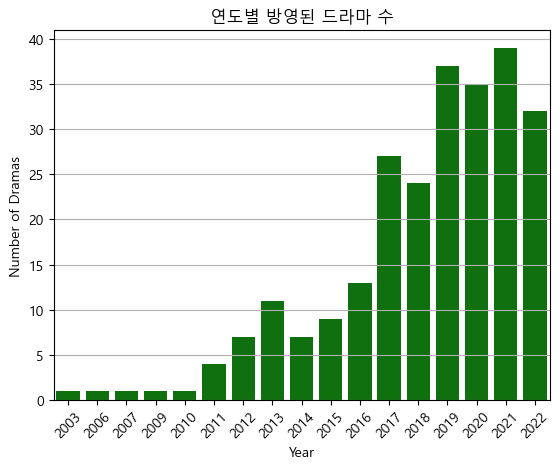

In [21]:
# 히스토그램 그리기
sb.countplot(data=df, x='Year of release', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Dramas')
plt.title('연도별 방영된 드라마 수')
plt.xticks(rotation=45)
plt.grid(axis='y')  # y축에 그리드 추가
plt.show()

In [93]:
df['Original Network'].unique()

array(['Netflix', 'tvN', 'Netflix,  tvN ', 'Wavve', 'Netflix, tvN',
       'ENA, Netflix', 'jTBC', 'MBC, Netflix', 'KBS2', 'MBC, Viki',
       'Netflix,  OCN ', 'MBC', 'SBS', 'OCN', 'Netflix,  SBS ',
       'Netflix, SBS', 'jTBC,  Netflix ', 'jTBC, Netflix', 'Hulu, MBC',
       'iQiyi, tvN', 'jTBC,  Viki ', 'ViuTV', 'Daum Kakao TV, Netflix',
       'KBS2,  Netflix ', 'jTBC, Viki', 'OCN, tvN', 'ENA, Olleh TV',
       'iQiyi, jTBC', 'KBS2, ViuTV', 'tvN, ViuTV', 'MBC, ViuTV',
       'Apple TV+', 'Disney+', 'iQiyi, KBS2, Viki', 'Channel A',
       'YouTube', 'Hulu', 'Naver TV Cast', 'MBN', 'SBS, ViuTV',
       'Daum Kakao TV', 'Viki', 'TV Chosun', 'KBS2, Netflix',
       'Naver TV Cast, vLive'], dtype=object)

In [95]:
# 'Original Network' 컬럼에서 Netflix가 포함된 데이터 개수 구하기
netflix_count = df[df['Original Network'].str.contains('Netflix', case=False, na=False)].shape[0] #대소문자를 구분하지 않고, NaN 값은 무시
netflix_count

56

In [99]:
# 네트워크별 드라마 수 계산
network_counts = df['Original Network'].value_counts()
network_counts

Original Network
tvN                       49
SBS                       30
MBC                       26
KBS2                      25
OCN                       19
Netflix,  tvN             16
jTBC                      15
Netflix                   12
Netflix, tvN               8
jTBC, Netflix              4
Netflix, SBS               4
MBC, Netflix               3
Netflix,  SBS              2
jTBC,  Netflix             2
YouTube                    2
iQiyi, tvN                 2
jTBC, Viki                 2
Wavve                      2
Viki                       1
Naver TV Cast              1
iQiyi, KBS2, Viki          1
Channel A                  1
Hulu                       1
SBS, ViuTV                 1
MBN                        1
TV Chosun                  1
Daum Kakao TV              1
KBS2, Netflix              1
Apple TV+                  1
Disney+                    1
Daum Kakao TV, Netflix     1
MBC, ViuTV                 1
tvN, ViuTV                 1
KBS2, ViuTV               

In [25]:
# 'Netflix,  tvN ' 두개가 합쳐진 값도 각각의 단어로 검색 시 데이터 개수에 합산될 수 있도록 해보기
# 검색할 단어들 리스트 정의
search_words = ['Netflix', 'Wavve', 'ENA', 'tvN', 'jTBC', 'OCN', 'SBS', 'KBS2', 'MBC', 'Daum Kakao TV', 'Olleh TV', 'Disney+', 'Channel A', 'TV Chosun', 'Naver TV Cast', 'MBN']

# 각 단어들이 포함된 데이터 개수 계산
counts = {}
for word in search_words:
    counts[word] = df[df['Original Network'].str.contains(word, case=False, na=False)].shape[0]

# 결과 출력
for word, count in counts.items():
    print(f"{word}가 포함된 데이터 개수: {count}")

Netflix가 포함된 데이터 개수: 56
Wavve가 포함된 데이터 개수: 2
ENA가 포함된 데이터 개수: 2
tvN가 포함된 데이터 개수: 77
jTBC가 포함된 데이터 개수: 25
OCN가 포함된 데이터 개수: 21
SBS가 포함된 데이터 개수: 37
KBS2가 포함된 데이터 개수: 29
MBC가 포함된 데이터 개수: 32
Daum Kakao TV가 포함된 데이터 개수: 2
Olleh TV가 포함된 데이터 개수: 1
Disney+가 포함된 데이터 개수: 1
Channel A가 포함된 데이터 개수: 1
TV Chosun가 포함된 데이터 개수: 1
Naver TV Cast가 포함된 데이터 개수: 2
MBN가 포함된 데이터 개수: 1


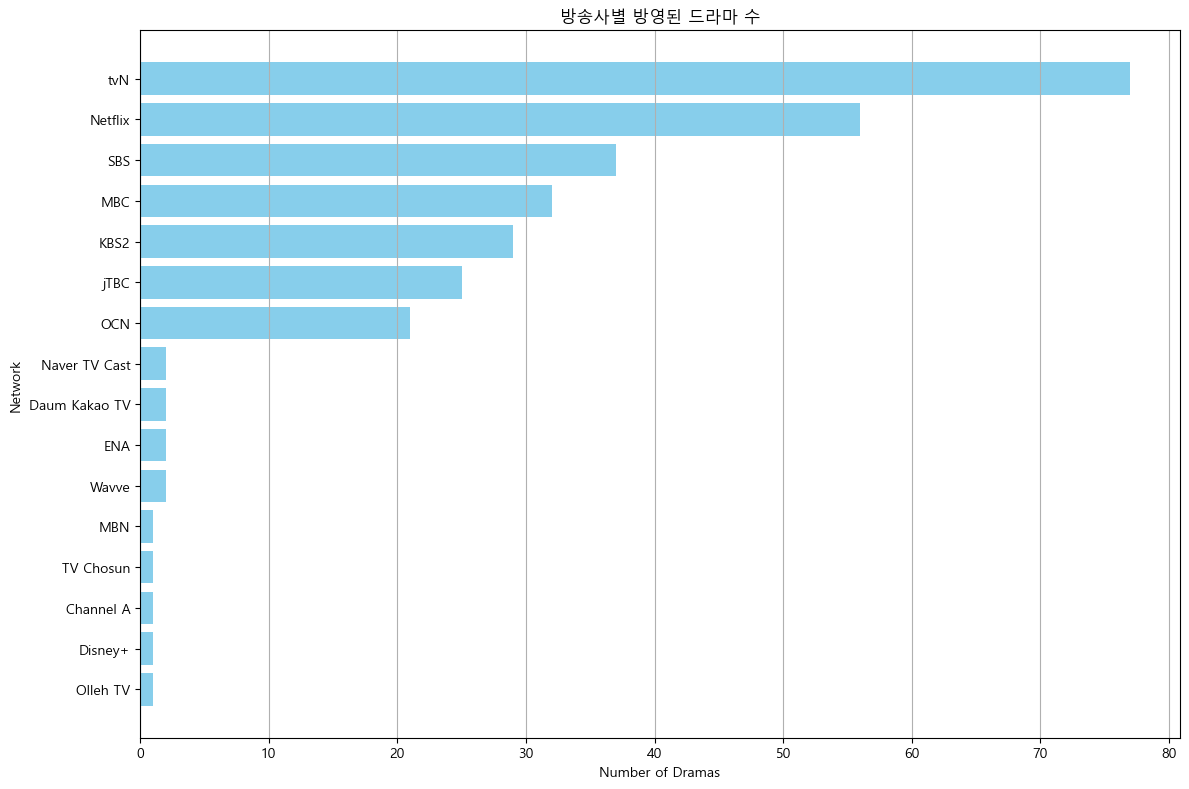

In [27]:
# 딕셔너리를 값(counts)으로 내림차순 정렬
counts_sorted = dict(sorted(counts.items(), key=lambda item: item[1], reverse=False))

# 결과를 가로 막대 그래프로 출력
plt.figure(figsize=(12, 8))
plt.barh(list(counts_sorted.keys()), list(counts_sorted.values()), color='skyblue')
plt.xlabel('Number of Dramas')
plt.ylabel('Network')
plt.title('방송사별 방영된 드라마 수')
plt.grid(axis='x')  # x축에 그리드 추가
plt.show()

In [29]:
df['Genre'].nunique()

205

In [117]:
df['Genre'].unique()

array(['Life,  Drama,  Family ',
       'Thriller,  Romance,  Crime,  Melodrama ',
       'Friendship,  Romance,  Life,  Medical ',
       'Psychological,  Life,  Drama,  Family ',
       'Comedy,  Romance,  Youth,  Family ', 'Action, Youth, Drama\r',
       'Comedy,  Crime,  Life,  Drama ',
       'Action, Historical, Romance, Fantasy ',
       'Law, Romance, Life, Drama ',
       'Historical,  Mystery,  Comedy,  Romance ',
       'Thriller,  Mystery,  Psychological,  Melodrama ',
       'Psychological,  Comedy,  Romance,  Drama ',
       'Military,  Comedy,  Romance,  Political ',
       'Comedy,  Law,  Crime,  Drama ',
       'Friendship,  Life,  Drama,  Family ',
       'Thriller,  Mystery,  Sci-Fi ',
       'Military,  Historical,  Romance,  Melodrama ',
       'Action,  Thriller,  Drama,  Fantasy ',
       'Thriller,  Historical,  Horror,  Supernatural ',
       'Mystery,  Psychological,  Drama,  Family ',
       'Action, Thriller, Drama, Fantasy ',
       'Action,  Thriller,  My

In [123]:
# # 장르 데이터 개수 계산
# genre_counts = df['Genre'].value_counts()

In [31]:
df['Genre'].value_counts()

Genre
Thriller, Mystery, Drama                     4
Comedy, Romance, Drama                       4
Psychological,  Comedy,  Romance,  Drama     4
Romance, Life, Drama, Melodrama              4
Action, Thriller, Mystery, Drama             3
                                            ..
Comedy,  Romance,  Drama,  Supernatural      1
Mystery,  Comedy,  Family,  Fantasy          1
Friendship,  Romance,  Life,  Youth          1
Psychological,  Romance,  Melodrama          1
Horror, Comedy, Romance, Fantasy             1
Name: count, Length: 205, dtype: int64

In [33]:
# 모든 단어를 저장할 빈 세트 생성
unique_words = set()

# 배열 내의 각 문자열을 공백으로 분리하고 세트에 추가
for genre in df['Genre'] :
    words = [word.strip(',') for word in genre.split()]
    unique_words.update(words)

# 세트의 길이를 출력하여 고유한 단어의 수를 확인
print("Total unique words in the array:", len(unique_words))
print("Total unique words in the array:", unique_words)

Total unique words in the array: 29
Total unique words in the array: {'Mystery', 'Medical', 'Romance', 'School', 'Supernatural', 'Sci-Fi', 'Political', 'Military', 'Youth', 'Historical', 'Crime', 'Friendship', 'Food', 'Thriller', 'Sports', 'Horror', 'Fantasy', 'Psychological', 'Life', 'Adventure', 'Melodrama', 'Comedy', 'Sitcom', 'Business', 'Law', 'Drama', 'Action', 'Family', 'Music'}


In [131]:
unique_words

{'Action',
 'Adventure',
 'Business',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Food',
 'Friendship',
 'Historical',
 'Horror',
 'Law',
 'Life',
 'Medical',
 'Melodrama',
 'Military',
 'Music',
 'Mystery',
 'Political',
 'Psychological',
 'Romance',
 'School',
 'Sci-Fi',
 'Sitcom',
 'Sports',
 'Supernatural',
 'Thriller',
 'Youth'}

In [43]:
# 장르별 드라마 보기
df[df['Genre'].str.contains('Action', case=False, na=False)]['Name']

6                                      Weak Hero Class 1
8                                       Alchemy of Souls
18                                             Happiness
21                                              Tomorrow
22                                                Healer
27                                   The Uncanny Counter
31                                                  D.P.
35                                           Taxi Driver
36                                          Life on Mars
40                                    Six Flying Dragons
59                             Strong Woman Do Bong Soon
60                                      The Fiery Priest
61                                               My Name
65                                Descendants of the Sun
74                                          Little Women
77                                       The Bridal Mask
90                                            Cruel City
95                             

In [45]:
from collections import Counter
# 각 장르 단어의 등장 횟수 세기
genre_counts = Counter()

# 데이터에서 각 행을 읽어와서 장르 단어를 분리하고 카운트하기
for i in df['Genre']:
    genres = i.split(', ')
    for genre in genres:
        genre_counts[genre.strip()] += 1

print(genre_counts)

Counter({'Romance': 136, 'Drama': 129, 'Mystery': 90, 'Comedy': 88, 'Thriller': 86, 'Life': 45, 'Action': 45, 'Melodrama': 43, 'Historical': 34, 'Fantasy': 34, 'Law': 27, 'Crime': 26, 'Supernatural': 24, 'Psychological': 19, 'Political': 18, 'Youth': 17, 'Family': 15, 'Medical': 15, 'Sci-Fi': 11, 'Horror': 11, 'Friendship': 9, 'Business': 9, 'Sports': 6, 'Military': 4, 'Music': 4, 'Adventure': 3, 'Food': 2, 'School': 2, 'Sitcom': 1})


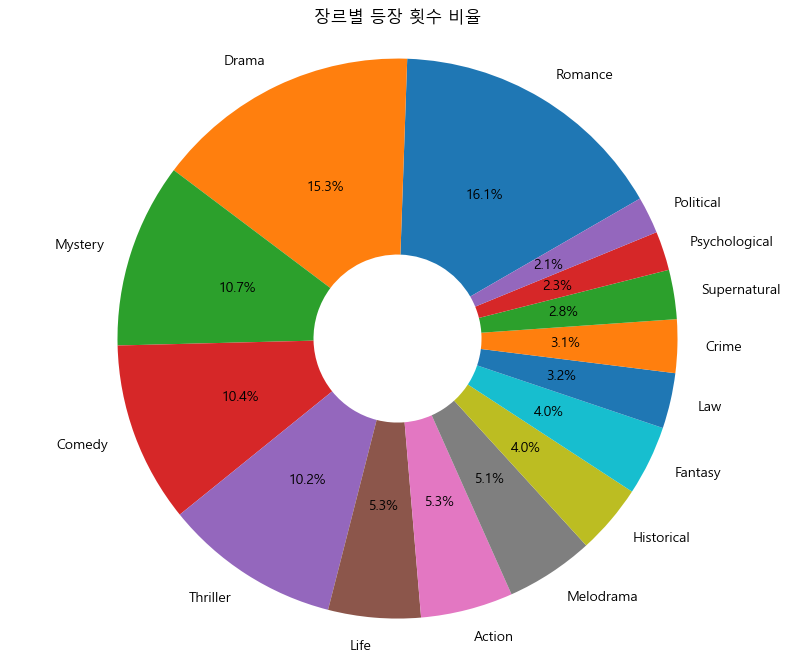

In [161]:
# 장르 카운트 데이터를 리스트로 변환
# labels = list(genre_counts.keys())
# sizes = list(genre_counts.values())

# 상위 15개 장르 추출
top_genres = genre_counts.most_common(15)
labels = [genre[0] for genre in top_genres]
sizes = [genre[1] for genre in top_genres]

# 파이차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30, wedgeprops={'width':0.7})
plt.axis('equal')  # 원 모양으로 조정
plt.title('장르별 드라마 수 비율')
plt.show()

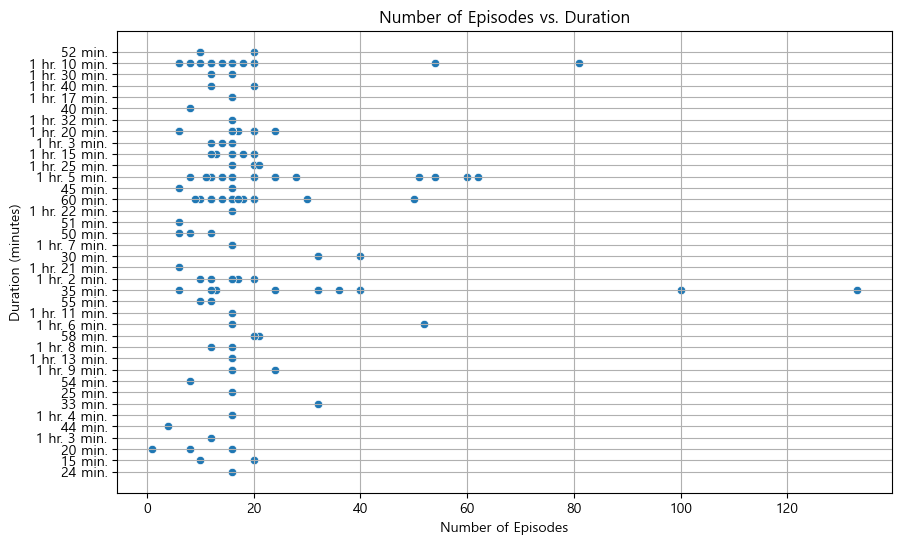

In [165]:
# 에피소드 수와 시청 시간 시각화
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Number of Episodes', y='Duration', data=df)
plt.title('Number of Episodes vs. Duration')
plt.xlabel('Number of Episodes')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

In [215]:
df['Director'].nunique()

185

In [227]:
(df['Director'] == ' ').sum()

1

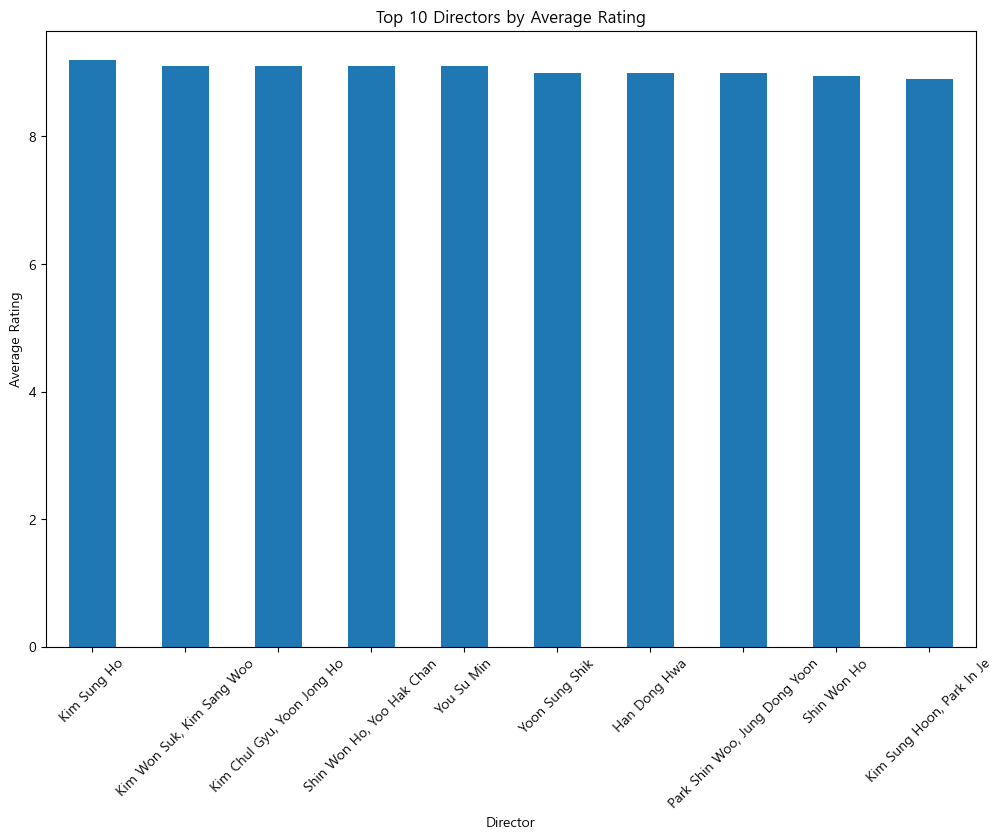

In [233]:
# 감독별 평균 평점 계산
# director_ratings = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

# ' ' 데이터 제외하고 감독별 평균 평점 계산
director_ratings = df[df['Director'] != ''].groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

# 시각화
plt.figure(figsize=(12, 8))
director_ratings.plot(kind='bar')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [171]:
df['Cast'].nunique()

249

In [173]:
df['Cast'].unique()

array(['Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Jung Suk Yong, Jung Young Joo, Lee Moon Shik',
       'Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo Hyun Woo, Nam Ki Ae, Son Jong Hak',
       'Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim Dae Myung, Jeon Mi Do, Shin Hyun Bin',
       'Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, Lee Ji Ah, Kim Young Min',
       'Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park Bo Gum, Lee Dong Hwi, Sung Dong Il',
       'Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim Su Gyeom, Lee Yeon, Shin Seung Ho',
       'Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im Hwa Young, Ye Soo Jung, Kim Kyung Nam',
       'Lee Jae Wook, Jung So Min, Hwang Hyun Min, Shin Seung Ho, Yoo Joon Sang, Oh Na Ra',
       'Park Eun Bin, Kang Tae Oh, Kang Ki Young, Jeon Bae Soo, Baek Ji Won, Jin Kyung',
       'Shin Hye Sun, Kim Jung Hyun, Bae Jong Ok, Kim Tae Woo, Jo Yun Hee, Seol In Ah',
       'Lee Bo Young, Heo Yool, Lee Hye Young, Go Sung Hee, Lee Jae Yoon, Go Bo Gyeol',
    

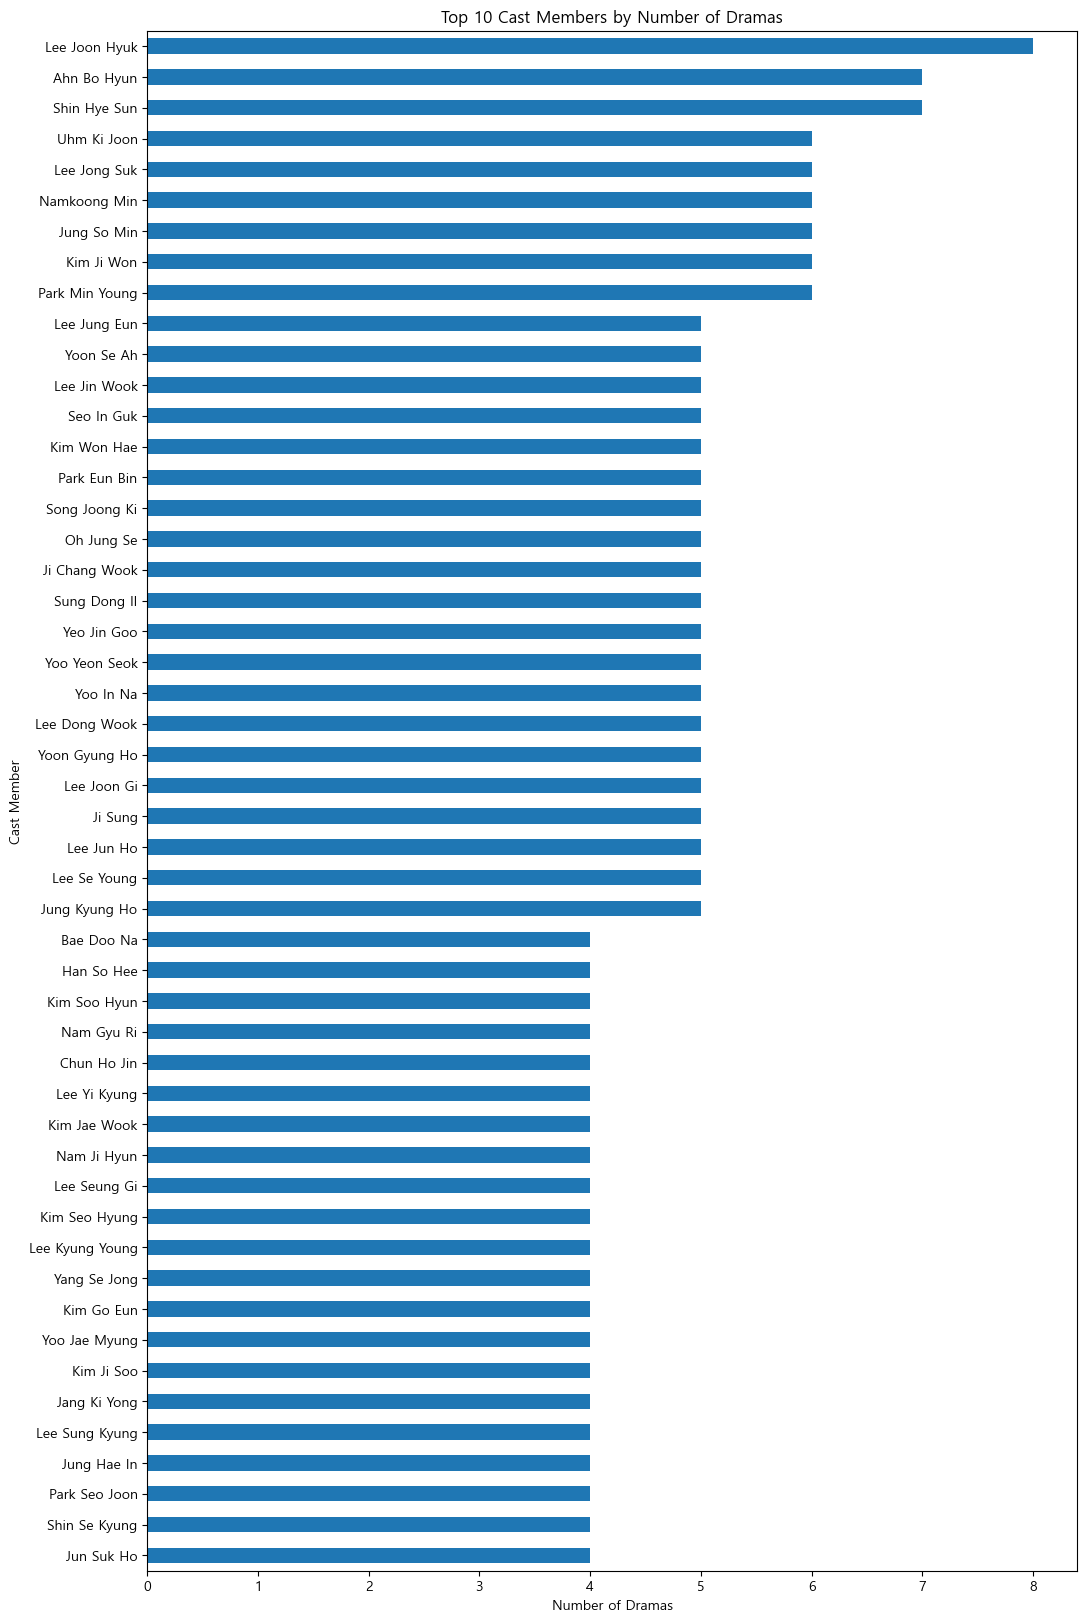

In [181]:
# 캐스트별 출연 횟수 계산
cast_counts = df['Cast'].str.split(',').explode().str.strip().value_counts()

# 상위 10명 캐스트만 추출
top_cast = cast_counts.head(50)

# 시각화
plt.figure(figsize=(12, 20))
top_cast.plot(kind='barh')
plt.title('Top 10 Cast Members by Number of Dramas')
plt.xlabel('Number of Dramas')
plt.ylabel('Cast Member')
plt.gca().invert_yaxis()  # 순서 뒤집기 (가장 많은 것이 위에 오도록)
plt.show()

In [185]:
df['Content Rating'].nunique()

5

In [187]:
df['Content Rating'].unique()

array(['18+ Restricted (violence & profanity)', '15+ - Teens 15 or older',
       '13+ - Teens 13 or older', ' ', 'G - All Ages'], dtype=object)

In [189]:
type(df['Content Rating'])

pandas.core.series.Series

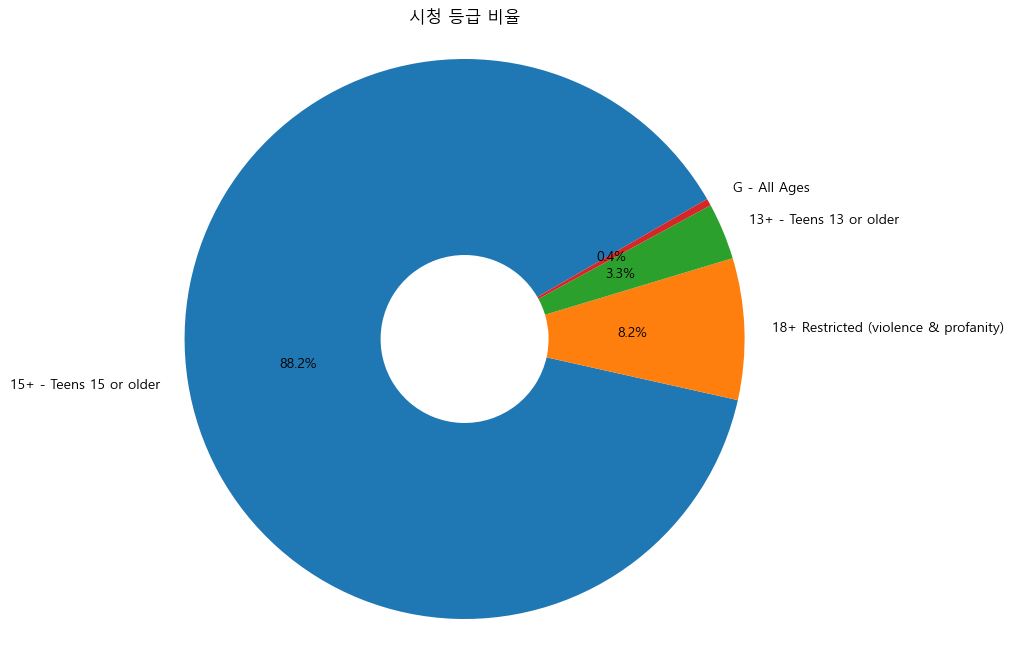

In [51]:
# 시청 등급 데이터를 카운트하여 Series로 가져오기
R_labels = df['Content Rating'].value_counts()

# ' ' 데이터 제외하기
R_labels = R_labels[R_labels.index != ' ']

# 시청 등급별 개수와 라벨 리스트 생성
labels = R_labels.index.tolist()  # 시청 등급
sizes = R_labels.values.tolist()  # 개수

# 파이차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30, wedgeprops={'width':0.7})
plt.axis('equal')  # 원 모양으로 조정
plt.title('시청 등급 비율')
plt.show()

In [53]:
# 시청가능 연령별 드라마 보기
df[df['Content Rating'].str.contains('G - All Ages', case=False, na=False)]['Name']

192    It's Okay, That's Friendship
Name: Name, dtype: object

평점 평균

In [13]:
R_mean = df['Rating'].mean()
R_mean

8.533999999999999

In [14]:
R_m = df['Rating'].quantile(0.9)  #백분위수 .quantile(0.9) : 상위10%
R_m

8.8

In [15]:
q_movies = df.copy().loc[df['Rating'] >= R_m]
q_movies.shape

(42, 17)

In [16]:
m_movies = df.copy().loc[df['Rating'] >= R_mean]
m_movies.shape

(100, 17)

In [17]:
q_movies['Rating'].sort_values()

45    8.8
24    8.8
25    8.8
26    8.8
27    8.8
29    8.8
30    8.8
32    8.8
31    8.8
34    8.8
35    8.8
36    8.8
37    8.8
38    8.8
39    8.8
40    8.8
33    8.8
42    8.8
21    8.9
23    8.9
22    8.9
20    8.9
18    8.9
17    8.9
19    8.9
8     9.0
10    9.0
11    9.0
9     9.0
13    9.0
14    9.0
15    9.0
16    9.0
12    9.0
7     9.1
6     9.1
5     9.1
4     9.1
3     9.1
2     9.1
1     9.1
0     9.2
Name: Rating, dtype: float64

In [18]:
q_movies = q_movies.sort_values('Aired Date', ascending=False)
q_movies[['Name', 'Aired Date', 'Rating']].head(10)

,Name,Aired Date,Rating
42,The Guest,"Sep 12, 2018 - Nov 1, 2018",8.8
33,The Penthouse,"Oct 26, 2020 - Jan 5, 2021",8.8
40,Six Flying Dragons,"Oct 5, 2015 - Mar 22, 2016",8.8
27,The Uncanny Counter,"Nov 28, 2020 - Jan 24, 2021",8.8
20,SKY Castle,"Nov 23, 2018 - Feb 1, 2019",8.9
7,Prison Playbook,"Nov 22, 2017 - Jan 18, 2018",9.1
6,Weak Hero Class 1,"Nov 18, 2022",9.1
30,Weightlifting Fairy Kim Bok Joo,"Nov 16, 2016 - Jan 11, 2017",8.8
25,The Red Sleeve,"Nov 12, 2021 - Jan 1, 2022",8.8
5,Reply 1988,"Nov 6, 2015 - Jan 16, 2016",9.1


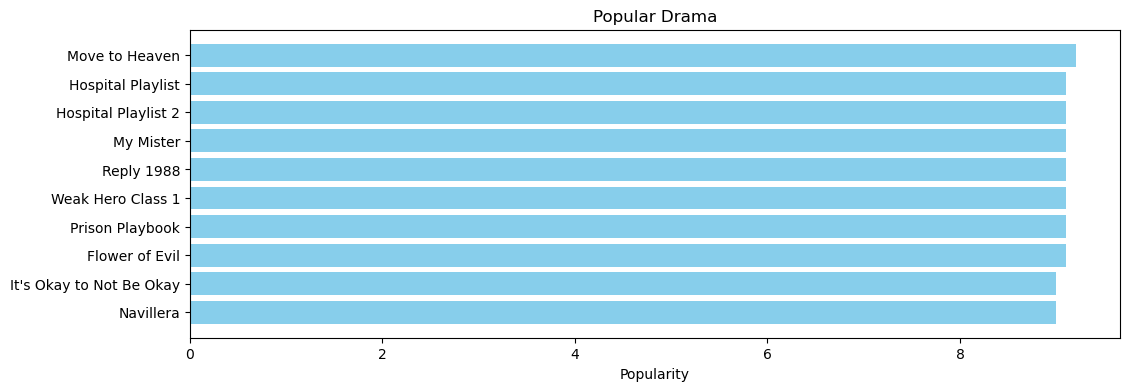

In [19]:
pop= df.sort_values('Rating', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['Name'].head(10),pop['Rating'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Drama")
plt.show()

## 2. 줄거리 기반 필터링


### 줄거리 기반 추천

In [235]:
df['Synopsis'].head(5)

0    Geu Roo is a young autistic man. He works for ...
1    Although Baek Hee Sung is hiding a dark secret...
2    The stories of people going through their days...
3    Everyday is extraordinary for five doctors and...
4    Park Dong Hoon is a middle-aged engineer who i...
Name: Synopsis, dtype: object

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')  #영어에서 큰 의미가 없는 단어 제거

In [239]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [241]:
df['Synopsis'].isnull().values.any()

False

In [243]:
tfidf_matrix = tfidf.fit_transform(df['Synopsis'])
tfidf_matrix.shape

(250, 3833)

In [245]:
tfidf_matrix

<250x3833 sparse matrix of type '<class 'numpy.float64'>'
	with 10688 stored elements in Compressed Sparse Row format>

In [247]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)   #coef_ 와 비슷한것
cosine_sim

array([[1.        , 0.01439857, 0.00584874, ..., 0.01784128, 0.        ,
        0.01110787],
       [0.01439857, 1.        , 0.01954729, ..., 0.02188562, 0.05738351,
        0.02420901],
       [0.00584874, 0.01954729, 1.        , ..., 0.03422956, 0.0149321 ,
        0.00668604],
       ...,
       [0.01784128, 0.02188562, 0.03422956, ..., 1.        , 0.        ,
        0.0177743 ],
       [0.        , 0.05738351, 0.0149321 , ..., 0.        , 1.        ,
        0.        ],
       [0.01110787, 0.02420901, 0.00668604, ..., 0.0177743 , 0.        ,
        1.        ]])

In [249]:
cosine_sim.shape

(250, 250)

In [251]:
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()  #드라마 제목이 인덱스가 되고, 인덱스가 값으로~
indices

Name
Move to Heaven              0
Flower of Evil              1
Hospital Playlist           2
Hospital Playlist 2         3
My Mister                   4
                         ... 
Live Up to Your Name      245
Queen for Seven Days      246
Memory                    247
A Korean Odyssey          248
Voice 4: Judgment Hour    249
Length: 250, dtype: int64

In [253]:
indices['Hospital Playlist']  #슬기로운 의사생활 인덱스 : 2

2

In [255]:
df.iloc[[2]]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3


In [257]:
# 영화의 제목을 입력받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화 목록 반환
def get_recommendations(Name, cosine_sim=cosine_sim):
    # 영화 제목을 통해서 전체 데이터 기준 그 영화의 index 값을 얻기
    idx = indices[Name]
    
    # 코사인 유사도 매트릭스 (cosine_sim) 에서 idx 에 해당하는 데이터를 (idx, 유사도) 형태로 얻기
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # 코사인 유사도 기준으로 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 자기 자신을 제외한 10개의 추천 영화를 슬라이싱
    sim_scores = sim_scores[1:11]
    
    # 추천 영화 목록 10개의 인덱스 정보 추출
    movie_indices = [i[0] for i in sim_scores]
    
    # 인덱스 정보를 통해 영화 제목 추출
    return df['Name'].iloc[movie_indices]

In [259]:
test_idx = indices['Hospital Playlist'] # 영화 제목을 통해서 전체 데이터 기준 그 영화의 index 값을 얻기
test_idx

2

In [261]:
cosine_sim[2]

array([0.00584874, 0.01954729, 1.        , 0.15770422, 0.01329204,
       0.06487571, 0.05041866, 0.03407563, 0.01372045, 0.01386023,
       0.        , 0.01884955, 0.        , 0.01091824, 0.01923586,
       0.        , 0.12304633, 0.04230823, 0.01042983, 0.02096698,
       0.02917118, 0.01715063, 0.06170291, 0.02519926, 0.0611385 ,
       0.00573475, 0.03799448, 0.01596845, 0.01083303, 0.        ,
       0.07148484, 0.        , 0.01677094, 0.01624146, 0.01990823,
       0.05326478, 0.        , 0.        , 0.04625158, 0.        ,
       0.        , 0.06085255, 0.04869393, 0.05530943, 0.04690052,
       0.00956312, 0.        , 0.0301692 , 0.        , 0.01115004,
       0.03862246, 0.14132172, 0.01008948, 0.04147842, 0.02547147,
       0.01014662, 0.02888709, 0.02219711, 0.        , 0.        ,
       0.        , 0.        , 0.02137849, 0.        , 0.03630889,
       0.07688242, 0.02147283, 0.02308412, 0.        , 0.0326842 ,
       0.01936405, 0.01756433, 0.01966047, 0.        , 0.03350

In [263]:
test_sim_scores = list(enumerate(cosine_sim[2])) # 코사인 유사도 매트릭스 (cosine_sim) 에서 idx 에 해당하는 데이터를 (idx, 유사도) 형태로 얻기

In [265]:
test_sim_scores

[(0, 0.0058487420151996095),
 (1, 0.01954728788095359),
 (2, 1.0),
 (3, 0.15770422051677274),
 (4, 0.013292037359451874),
 (5, 0.06487571389439388),
 (6, 0.05041866072139529),
 (7, 0.03407562785808776),
 (8, 0.01372045467699947),
 (9, 0.013860234805344769),
 (10, 0.0),
 (11, 0.018849546811199474),
 (12, 0.0),
 (13, 0.010918243500587503),
 (14, 0.01923585957716637),
 (15, 0.0),
 (16, 0.12304633114971063),
 (17, 0.042308230783446685),
 (18, 0.010429825917601785),
 (19, 0.02096698493171314),
 (20, 0.029171179579347728),
 (21, 0.017150633880202815),
 (22, 0.06170290700535906),
 (23, 0.025199263972567734),
 (24, 0.061138496725746685),
 (25, 0.00573475279556016),
 (26, 0.0379944826483379),
 (27, 0.015968447590265313),
 (28, 0.01083303487526314),
 (29, 0.0),
 (30, 0.07148484391732846),
 (31, 0.0),
 (32, 0.01677094472654577),
 (33, 0.01624145591751798),
 (34, 0.01990822829899712),
 (35, 0.053264780977744654),
 (36, 0.0),
 (37, 0.0),
 (38, 0.04625158150318521),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0

In [269]:
test_sim_scores = sorted(test_sim_scores, key=lambda x: x[1], reverse=True) # 코사인 유사도 기준으로 내림차순 정렬
test_sim_scores[1:11] # 자기 자신을 제외한 5개의 추천 영화를 슬라이싱

[(3, 0.15770422051677274),
 (159, 0.1508547096623846),
 (51, 0.1413217230867055),
 (75, 0.12372629679327721),
 (16, 0.12304633114971063),
 (243, 0.11138391510955678),
 (80, 0.10150321464669493),
 (244, 0.09689766518536114),
 (138, 0.09479064731541373),
 (78, 0.08768379958390438)]

In [56]:
# # 함수 설명
# def get_second(x):
#     return x[1]

# lst = ['인덱스', '유사도']
# print(get_second(lst))   결과 : 유사도

In [58]:
# (lambda x: x[1])(lst) 결과 : 유사도

In [271]:
# 추천 영화 목록 10개의 인덱스 정보 추출
test_drama_indices = [i[0] for i in test_sim_scores[1:11]]
test_drama_indices

[3, 159, 51, 75, 16, 243, 80, 244, 138, 78]

In [273]:
# 인덱스 정보를 통해 영화 제목 추출
df['Name'].iloc[test_drama_indices]

3      Hospital Playlist 2
159        Doctor Prisoner
51          Dr. Romantic 2
75            Ghost Doctor
16                  Signal
243     God's Quiz: Reboot
80        The King of Pigs
244         Missing Noir M
138                   Lost
78      Children of Nobody
Name: Name, dtype: object

In [275]:
df['Name'][:20]

0                 Move to Heaven
1                 Flower of Evil
2              Hospital Playlist
3            Hospital Playlist 2
4                      My Mister
5                     Reply 1988
6              Weak Hero Class 1
7                Prison Playbook
8               Alchemy of Souls
9     Extraordinary Attorney Woo
10                     Mr. Queen
11                        Mother
12      It's Okay to Not Be Okay
13          Crash Landing on You
14                      Vincenzo
15                     Navillera
16                        Signal
17                  Mr. Sunshine
18                     Happiness
19             Kingdom: Season 2
Name: Name, dtype: object

In [277]:
get_recommendations('A Korean Odyssey')   #위에 함수 실행

217            Touch Your Heart
204                  Ugly Alert
221                        Mine
162            Her Private Life
226                 Five Enough
84         My Father is Strange
16                       Signal
80             The King of Pigs
211                      Run On
134    The World of the Married
Name: Name, dtype: object

In [279]:
get_recommendations('Touch Your Heart')

45             The Penthouse 2
221                       Mine
64                Dr. Romantic
248           A Korean Odyssey
189         The Sound of Magic
169    My Country: The New Age
74                Little Women
55            Kill Me, Heal Me
173            Come and Hug Me
157          Extraordinary You
Name: Name, dtype: object

### 다양한 요소 기반 추천 (장르, 감독, 키워드 등)

In [281]:
df.head(3)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3


In [283]:
df.loc[0, 'Genre']

'Life,  Drama,  Family '

In [285]:
df.loc[0, 'Cast']

'Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Jung Suk Yong, Jung Young Joo, Lee Moon Shik'

In [287]:
df[['Name', 'Genre', 'Director', 'Cast', 'Screenwriter']].head(3)

,Name,Genre,Director,Cast,Screenwriter
0,Move to Heaven,"Life, Drama, Family",Kim Sung Ho,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...",Yoon Ji Ryun
1,Flower of Evil,"Thriller, Romance, Crime, Melodrama","Kim Chul Gyu, Yoon Jong Ho","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Yoo Jung Hee
2,Hospital Playlist,"Friendship, Romance, Life, Medical",Shin Won Ho,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...",Lee Woo Jung


In [54]:
type(df['Genre'])

pandas.core.series.Series

In [55]:
df['Genre'] = list(df['Genre'])
# df['Director'] = list(df['Director'])
# df['Cast'] = list(df['Cast'])
# df['Screenwriter'] = list(df['Screenwriter'])

In [56]:
df[['Genre']]

,Genre
0,"Life, Drama, Family"
1,"Thriller, Romance, Crime, Melodrama"
2,"Friendship, Romance, Life, Medical"
3,"Friendship, Romance, Life, Medical"
4,"Psychological, Life, Drama, Family"
...,...
245,"Historical, Romance, Medical, Fantasy"
246,"Historical, Romance, Melodrama, Political"
247,"Law, Romance, Life, Drama"
248,"Horror, Comedy, Romance, Fantasy"


In [289]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(', ', ' ')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(', ', ' '))
        else:
            return ''

In [291]:
features = ['Genre']
for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [293]:
df[['Genre']].head(3)

,Genre
0,life drama family
1,thriller romance crime melodrama
2,friendship romance life medical


In [295]:
df['Cast'] = list(df['Cast'])

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ', '')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ', ' '))
        else:
            return ''

features = ['Cast']
for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [297]:
df[['Cast']].head(3)

,Cast
0,"lee je hoon, tang jun sang, hong seung hee, ju..."
1,"lee joon gi, moon chae won, jang hee jin, seo ..."
2,"jo jung suk, yoo yeon seok, jung kyung ho, kim..."


In [299]:
df['Cast'] = df['Cast'].str.replace(' ', '')

In [301]:
df['Cast'] = df['Cast'].str.replace(',', ' ')

In [303]:
df['Cast']

0      leejehoon tangjunsang hongseunghee jungsukyong...
1      leejoongi moonchaewon jangheejin seohyunwoo na...
2      jojungsuk yooyeonseok jungkyungho kimdaemyung ...
3      jojungsuk yooyeonseok jungkyungho kimdaemyung ...
4      leesunkyun iu parkhosan songsaebyuk leejiah ki...
                             ...                        
245    kimnamgil kimahjoong yoominkyu moongayoung yoo...
246    parkminyoung yeonwoojin leedonggun janghyunsun...
247    leesungmin kimjeesoo parkjinhee leejunho jeonn...
248    leeseunggi chaseungwon ohyeonseo leehongki jan...
249    leehana songseungheon soneunseo kangseungyoon ...
Name: Cast, Length: 250, dtype: object

In [305]:
df['Director'] = df['Director'].str.replace(' ', '')
df['Director'] = df['Director'].str.replace(',', ' ')
df['Director']

0                                 KimSungHo
1                     KimChulGyu YoonJongHo
2                                 ShinWonHo
3                                 ShinWonHo
4                      KimWonSuk KimSangWoo
                       ...                 
245                            HongJongChan
246                              LeeJungSub
247                            ParkChanHong
248    ParkHongKyun KimJungHyun KimByungSoo
249                 ShinYongHwi YoonRaYoung
Name: Director, Length: 250, dtype: object

In [307]:
df['Screenwriter'] = df['Screenwriter'].str.replace(' ', '')
df['Screenwriter'] = df['Screenwriter'].str.replace(',', ' ')
df['Screenwriter']

0                 YoonJiRyun
1                 YooJungHee
2                 LeeWooJung
3                 LeeWooJung
4               ParkHaeYoung
               ...          
245                KimEunHee
246             ChoiJinYoung
247                 KimJiWoo
248    HongJungEun HongMiRan
249                 MaJinWon
Name: Screenwriter, Length: 250, dtype: object

In [309]:
df.isna().sum()

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          0
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                0
Screenwriter            0
Cast                    0
Production companies    0
Rank                    0
dtype: int64

In [311]:
def create_keyword(x):
    if pd.notna(x['Genre']) and pd.notna(x['Director']) and pd.notna(x['Cast']) and pd.notna(x['Screenwriter']):
        return x['Genre'] + ' ' + x['Director'] + ' ' + x['Cast'] + ' ' + x['Screenwriter']
    else:
        return ''

In [315]:
df['keyword'] = df.apply(create_keyword, axis=1)
df['keyword']

0      life  drama  family  KimSungHo leejehoon tangj...
1      thriller  romance  crime  melodrama  KimChulGy...
2      friendship  romance  life  medical  ShinWonHo ...
3      friendship  romance  life  medical  ShinWonHo ...
4      psychological  life  drama  family  KimWonSuk ...
                             ...                        
245    historical romance medical fantasy HongJongCha...
246    historical romance melodrama political LeeJung...
247    law romance life drama ParkChanHong leesungmin...
248    horror comedy romance fantasy ParkHongKyun Kim...
249    action thriller mystery crime ShinYongHwi Yoon...
Name: keyword, Length: 250, dtype: object

In [317]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['keyword'])
count_matrix

<250x1250 sparse matrix of type '<class 'numpy.int64'>'
	with 3130 stored elements in Compressed Sparse Row format>

In [319]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.        , 0.08703883, ..., 0.17407766, 0.        ,
        0.        ],
       [0.        , 1.        , 0.08006408, ..., 0.08006408, 0.07161149,
        0.15384615],
       [0.08703883, 0.08006408, 1.        , ..., 0.16666667, 0.0745356 ,
        0.        ],
       ...,
       [0.17407766, 0.08006408, 0.16666667, ..., 1.        , 0.0745356 ,
        0.        ],
       [0.        , 0.07161149, 0.0745356 , ..., 0.0745356 , 1.        ,
        0.        ],
       [0.        , 0.15384615, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [321]:
indices['Hospital Playlist']

2

In [323]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['Name'])
indices

Name
Move to Heaven              0
Flower of Evil              1
Hospital Playlist           2
Hospital Playlist 2         3
My Mister                   4
                         ... 
Live Up to Your Name      245
Queen for Seven Days      246
Memory                    247
A Korean Odyssey          248
Voice 4: Judgment Hour    249
Length: 250, dtype: int64

In [325]:
get_recommendations('My Mister', cosine_sim2)

0            Move to Heaven
15                Navillera
20               SKY Castle
33            The Penthouse
43          Dear My Friends
45          The Penthouse 2
58                  Misaeng
70      My Liberation Notes
82           Go Back Couple
161    My Unfamiliar Family
Name: Name, dtype: object

In [327]:
get_recommendations('SKY Castle', cosine_sim2)

124              Snowdrop
221                  Mine
33          The Penthouse
37            Beyond Evil
45        The Penthouse 2
78     Children of Nobody
87             Stranger 2
101          Nobody Knows
230             Liar Game
4               My Mister
Name: Name, dtype: object

In [329]:
indices['Nobody Knows']

101

In [331]:
import pickle

In [333]:
df.head(3)

,index,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,keyword
0,0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,life drama family,"Autism, Uncle-Nephew Relationship, Death, Sava...",KimSungHo,YoonJiRyun,leejehoon tangjunsang hongseunghee jungsukyong...,"Page One Film, Number Three Pictures",#1,life drama family KimSungHo leejehoon tangj...
1,1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,thriller romance crime melodrama,"Married Couple, Deception, Suspense, Family Se...",KimChulGyu YoonJongHo,YooJungHee,leejoongi moonchaewon jangheejin seohyunwoo na...,Monster Union,#2,thriller romance crime melodrama KimChulGy...
2,2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,friendship romance life medical,"Strong Friendship, Multiple Mains, Best Friend...",ShinWonHo,LeeWooJung,jojungsuk yooyeonseok jungkyungho kimdaemyung ...,"Egg Is Coming, CJ ENM",#3,friendship romance life medical ShinWonHo ...


In [335]:
drama = df[['Name', 'Tags']].copy()
drama.head(5)

,Name,Tags
0,Move to Heaven,"Autism, Uncle-Nephew Relationship, Death, Sava..."
1,Flower of Evil,"Married Couple, Deception, Suspense, Family Se..."
2,Hospital Playlist,"Strong Friendship, Multiple Mains, Best Friend..."
3,Hospital Playlist 2,"Workplace, Strong Friendship, Best Friends, Mu..."
4,My Mister,"Age Gap, Nice Male Lead, Strong Female Lead, H..."


In [337]:
pickle.dump(drama, open('drama.pickle', 'wb'))

In [343]:
pickle.dump(cosine_sim2, open('cosine_sim.pickle', 'wb'))